In [ ]:
###############################################################################################################################
#
#   Copyright © 2022 Center for Agricultural Systems Biology
#   Authorship and citation: Ruengsrichaiya B., Nukoolkit C., Kalapanulak S. and Saithong T., 
#   (202x) Plant-DTI: Extending the landscape of TF protein and DNA interaction in plants by a machine learning-based approach. 
#   xxxxx., xx, xxx. (in preperation). 
#   Contact: bhukrit.r@mail.kmutt.ac.th
#
##############################################################################################################################
#   
#   Pseudocode for model hyperparameter tuning with Random Forest classifier using scikit learn:
#   Automatically optimized hyperparameter of each model using GridSearchCV package
#   Classes labeled  are 1 (interacted) and 0 (not interacted)
#   Random within models (RW) are avaiable for TFBS length range from 7-15 bp.
#   Random pairs models (RP) are avaiable for TFBS length range from 7-14 bp.
#
##############################################################################################################################
#  
#   Here we use Random within model length 7 as an example to show the model hyperparameter tuning process. 
#   For other model, Please change the input data to before training.
#
###############################################################################################################################


In [1]:
#Import all required library
import pandas as pd  
import matplotlib.pyplot as pyplot
import sklearn

from textwrap import wrap
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


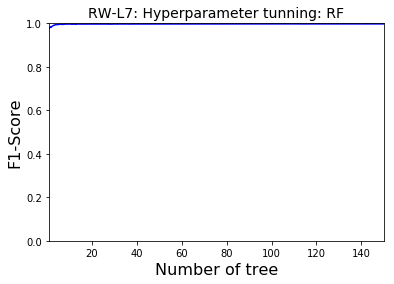

Done! Please see your results in folder: OUTPUT


In [2]:
##Tuning hyperparameter: number of trees from 1 to 150 

#read train_data
X_train = pd.read_csv('Data/train_data/70_holdout_X_train_len7_RW.csv')
Y_train = pd.read_csv('Data/train_data/70_holdout_Y_train_len7_RW.csv')

#read test_data
X_test = pd.read_csv('Data/test_data/30_holdout_X_test_len7_RW.csv')
Y_test = pd.read_csv('Data/test_data/30_holdout_Y_test_len7_RW.csv')

#set hyperparameter tunning result plot name
hyper_plot_name = 'RW-L7: Hyperparameter tunning: RF'

#Random forrest tune
model = RandomForestClassifier(random_state=100)
n_estimators = range(1, 151, 1)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring="f1")
grid_result = grid_search.fit(X_train, Y_train['class'])



# create file for summarize results
best_para=str("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


#collect each iterative of tuning result
report_tune_df=pd.DataFrame(grid_result.cv_results_)
report_tune_df['Experiment']= hyper_plot_name
report_tune_df.to_csv('OUTPUT/'+ 'example_tuned_result.csv', index=False)




# plot scale parameter tuning
pyplot.ylim(0,1)
pyplot.xlim(1,150)
pyplot.errorbar(n_estimators, means, yerr=stds, color='b')
pyplot.title("\n".join(wrap(hyper_plot_name,40)), fontsize=14)
pyplot.xlabel('Number of tree', fontsize=16)
pyplot.ylabel('F1-Score', fontsize=16)
pyplot.show()


print('Done! Please see your results in folder: OUTPUT')
